# Gesture Recognition
In this group project, you are going to build a 3D Conv model that will be able to predict the 5 gestures correctly. Please import the following libraries to get started.

## Loading all the required library for the gesture recognition problem

In [3]:
import numpy as np
import os
from scipy.misc import imread, imresize
import datetime
import os
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, Dropout,LSTM
from keras.layers.convolutional import Conv3D,Conv2D, MaxPooling3D,MaxPooling2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.layers.recurrent import LSTM, GRU

Using TensorFlow backend.


#### Setting the random seed so that the results don't vary drastically.

In [4]:
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
tf.set_random_seed(30)

In this block, you read the folder names for training and validation. You also set the `batch_size` here. Note that you set the batch size in such a way that you are able to use the GPU in full capacity. You keep increasing the batch size until the machine throws an error.

In [5]:
train_doc = np.random.permutation(open('Project_data/train.csv').readlines())
val_doc = np.random.permutation(open('Project_data/val.csv').readlines())
batch_size = 64 #experiment with the batch size wil be done in all new data generator function calls

#### Checking the paths and data availability at the path

In [17]:
curr_dt_time = datetime.datetime.now()
train_path = 'Project_data/train'
val_path = 'Project_data/val'
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)

# training sequences = 663
# validation sequences = 100


In [52]:
train_doc[1]

'WIN_20180926_17_00_22_Pro_Stop_new;Stop_new;2\n'

In [13]:
t = np.random.permutation(train_doc)
imgs = os.listdir(train_path +'/'+t[1].split(';')[0])

In [9]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import cv2

#### Reading to have glimpse on image from the specified path

In [54]:
from scipy.misc import imread, imresize
img = imread(train_path +'/'+t[1].strip().split(';')[0]+'/'+imgs[1])

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [55]:
img.shape

(120, 160, 3)

In [59]:
len(t)

663

In [85]:
import warnings
warnings.filterwarnings("ignore")

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


PATH :  Project_data/train/WIN_20180907_16_27_42_Pro_Right Swipe_new/WIN_20180907_16_27_42_Pro_00051.png 

Image Shape:  (360, 360, 3)


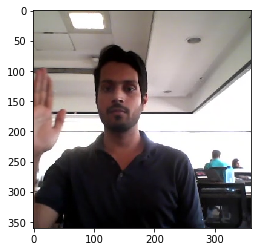

In [14]:
from scipy.misc import imread, imresize
k = 342
t[k].strip().split(';')[0]
imgs = os.listdir(train_path +'/'+t[k].split(';')[0])
path = train_path +'/'+t[k].strip().split(';')[0]+'/'+imgs[3]
img = imread(path)
img1 = Image.open(path)
print("PATH : ",path,"\n")
plt.imshow(img1)
print("Image Shape: ",img.shape)
plt.show()

PATH :  Project_data/train/WIN_20180926_16_49_49_Pro_Thumbs_Up_new/WIN_20180926_16_49_49_Pro_00040.png 

Image Shape:  (120, 160, 3)


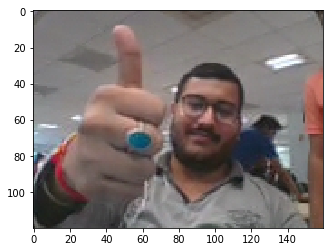

In [176]:
from scipy.misc import imread, imresize
k = 580
t[k].strip().split(';')[0]
imgs = os.listdir(train_path +'/'+t[k].split(';')[0])
path = train_path +'/'+t[k].strip().split(';')[0]+'/'+imgs[3]
img = imread(path)
img1 = Image.open(path)
print("PATH : ",path,"\n")
plt.imshow(img1)
print("Image Shape: ",img.shape)
plt.show()

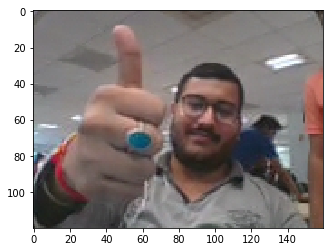

In [177]:
image = imresize(img1,(120,160))
plt.imshow(image)

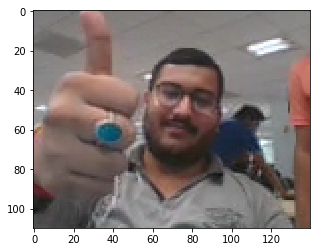

In [178]:
image1 = image[10:120, 20:160]
plt.imshow(image1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


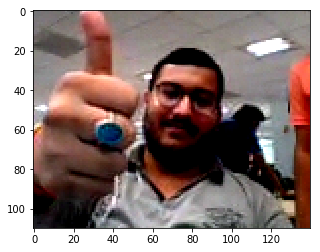

In [168]:
image2 = (image1/127.5) - 0.5
plt.imshow(image2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


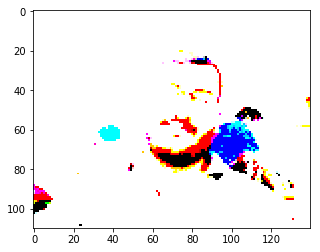

In [156]:
image1 = image1 - np.percentile(image1,2)/ (np.percentile(image1,98) - np.percentile(image1,5))
plt.imshow(image1)

In [180]:
image1.shape

(110, 140, 3)

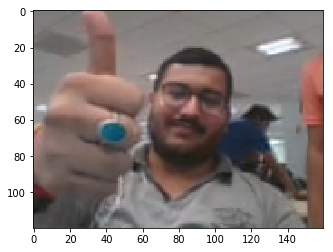

In [182]:
image2 = imresize(image1,(120,160))
plt.imshow(image2)

In [83]:
train_path +'/'+t[k].strip().split(';')[0]+'/'+imgs[3]

'Project_data/train/WIN_20180907_15_51_58_Pro_Right Swipe_new/WIN_20180907_15_51_58_Pro_00035.png'

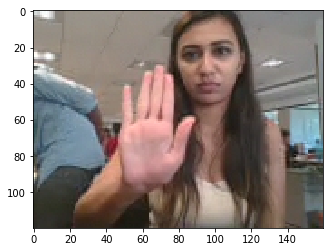

In [97]:
image = imresize(img1,(120,160))
plt.imshow(image)

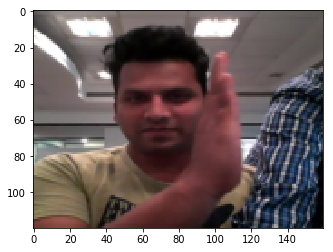

In [100]:
image = imresize(img1,(120,160))
plt.imshow(image)

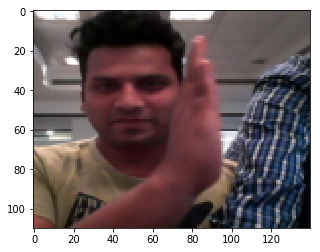

In [117]:
image1 = image[10:120, 20:160]
plt.imshow(image1)

In [124]:
'/'+train_path +'/'+t[k].split(';')[0]

'/Project_data/train/WIN_20180907_15_51_58_Pro_Right Swipe_new'

In [130]:
pwd()

'/mnt/disks/user/project/PROJECT'

In [133]:
import glob
 
img_array = []
for filename in glob.glob('Project_data/train/WIN_20180907_15_51_58_Pro_Right Swipe_new/*.png'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

#### Checking all the frames present in a single gesture folder

In [30]:
t[1].strip().split(';')[0]

'WIN_20180926_17_35_17_Pro_Stop_new'

In [27]:
imgs[3]

'WIN_20180926_17_35_17_Pro_00062.png'

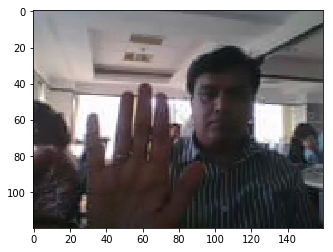

In [26]:
img = Image.open(train_path +'/'+t[1].strip().split(';')[0]+'/'+imgs[3])
plt.imshow(img)

In [24]:
imgs

['WIN_20180926_17_35_17_Pro_00008.png',
 'WIN_20180926_17_35_17_Pro_00048.png',
 'WIN_20180926_17_35_17_Pro_00028.png',
 'WIN_20180926_17_35_17_Pro_00062.png',
 'WIN_20180926_17_35_17_Pro_00004.png',
 'WIN_20180926_17_35_17_Pro_00060.png',
 'WIN_20180926_17_35_17_Pro_00020.png',
 'WIN_20180926_17_35_17_Pro_00016.png',
 'WIN_20180926_17_35_17_Pro_00042.png',
 'WIN_20180926_17_35_17_Pro_00034.png',
 'WIN_20180926_17_35_17_Pro_00054.png',
 'WIN_20180926_17_35_17_Pro_00052.png',
 'WIN_20180926_17_35_17_Pro_00050.png',
 'WIN_20180926_17_35_17_Pro_00012.png',
 'WIN_20180926_17_35_17_Pro_00058.png',
 'WIN_20180926_17_35_17_Pro_00006.png',
 'WIN_20180926_17_35_17_Pro_00022.png',
 'WIN_20180926_17_35_17_Pro_00044.png',
 'WIN_20180926_17_35_17_Pro_00056.png',
 'WIN_20180926_17_35_17_Pro_00014.png',
 'WIN_20180926_17_35_17_Pro_00040.png',
 'WIN_20180926_17_35_17_Pro_00032.png',
 'WIN_20180926_17_35_17_Pro_00038.png',
 'WIN_20180926_17_35_17_Pro_00010.png',
 'WIN_20180926_17_35_17_Pro_00018.png',


------ 1 ------


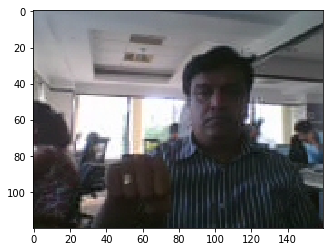

------ 2 ------


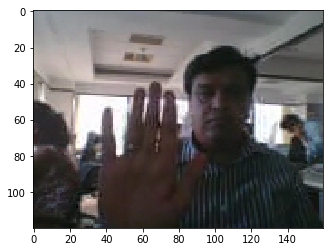

------ 3 ------


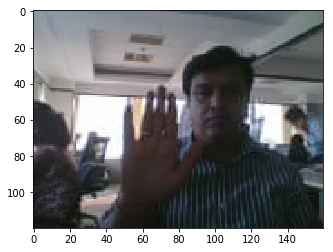

------ 4 ------


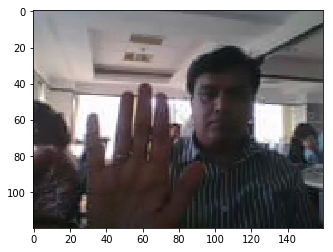

------ 5 ------


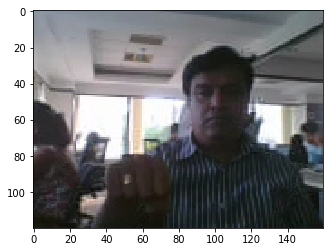

------ 6 ------


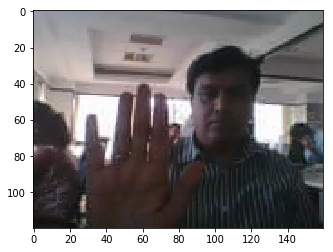

------ 7 ------


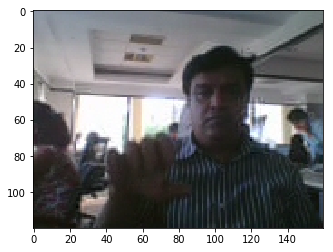

------ 8 ------


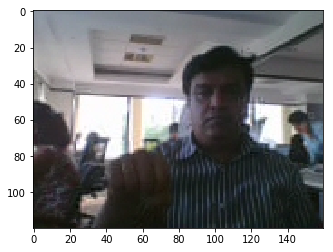

------ 9 ------


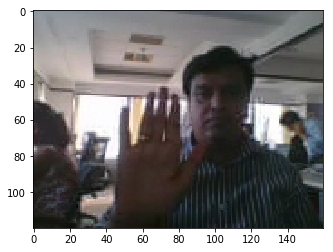

------ 10 ------


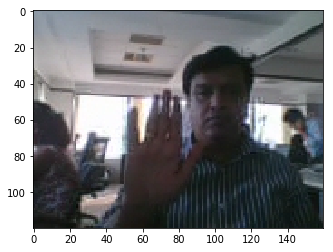

------ 11 ------


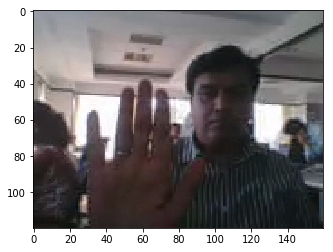

------ 12 ------


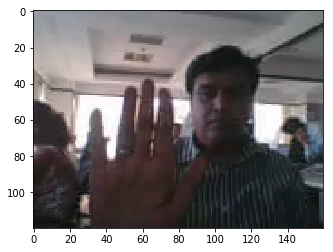

------ 13 ------


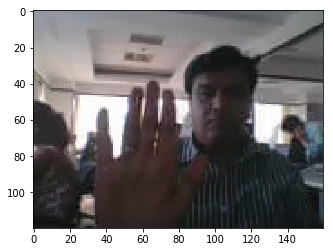

------ 14 ------


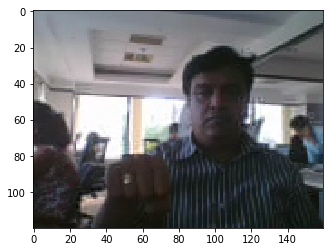

------ 15 ------


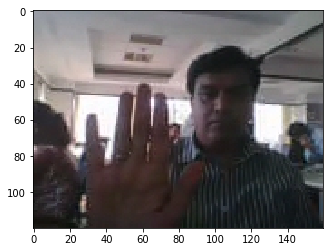

------ 16 ------


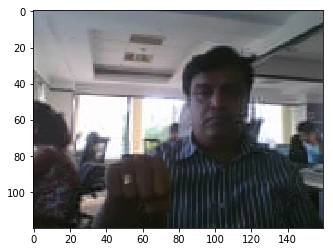

------ 17 ------


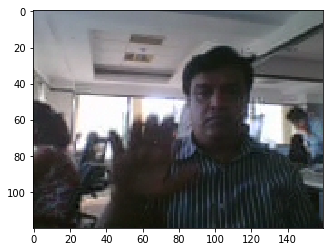

------ 18 ------


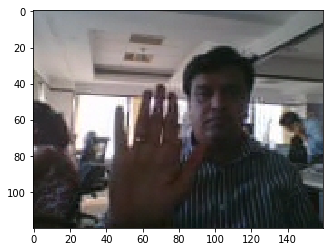

------ 19 ------


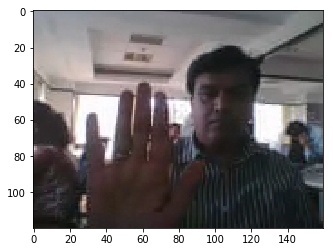

------ 20 ------


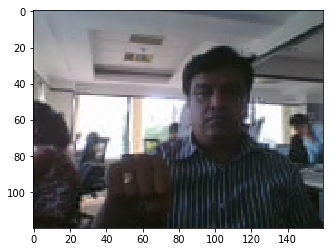

------ 21 ------


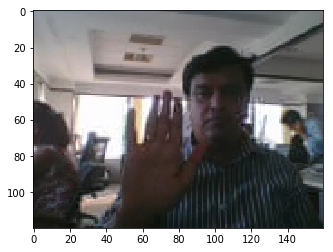

------ 22 ------


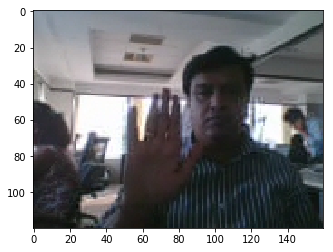

------ 23 ------


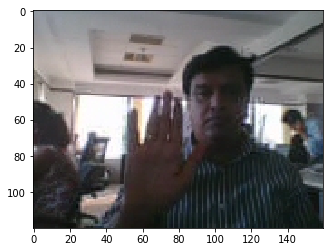

------ 24 ------


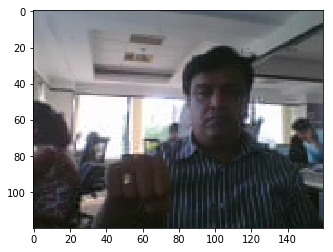

------ 25 ------


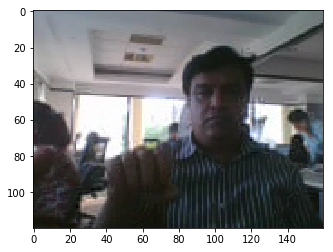

------ 26 ------


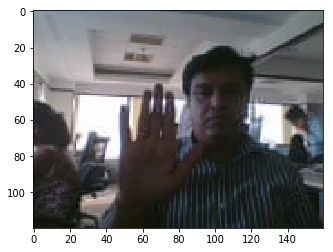

------ 27 ------


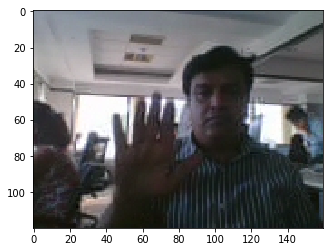

------ 28 ------


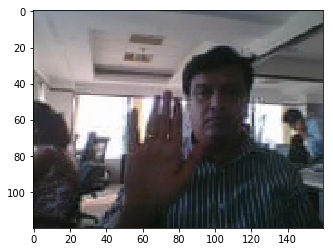

------ 29 ------


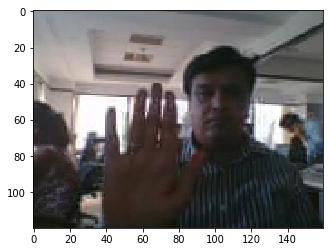

In [34]:
for j,i in zip(range(1,len(imgs)),imgs):
    img = Image.open(train_path +'/'+t[1].strip().split(';')[0]+'/'+i)
    print("------",j,"------")
    plt.imshow(img)
    plt.show()

## Creating custom generator function

## Generator 1
This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with `img_idx`, `y`,`z` and normalization such that you get high accuracy.

In [187]:
def generator(source_path, folder_list, batch_size):
    print( 'Source path = ', source_path, '; batch size =', batch_size)
    #x is the number of images you use for each video
    frames = 30
    # (y,z) is the final size of the input images
    y = 50
    z = 50
    #using all 30 frames in the video.
    img_idx = [x for x in range(0, frames)]  #create a list of image numbers you want to use for a particular video
    while True:
        t = np.random.permutation(folder_list)
        num_batches =len(folder_list)//batch_size # calculate the number of batches
        #num_batches = 1 ## while testing for the model for a trial run
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,frames,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    image = imresize(image,(50,50))
                    image = image - np.percentile(image,5)/ np.percentile(image,95) - np.percentile(image,5)
                    batch_data[folder,idx,:,:,0] = image[:,:,0] #normalise and feed in the image
                    batch_data[folder,idx,:,:,1] = image[:,:,1] #normalise and feed in the image
                    batch_data[folder,idx,:,:,2] = image[:,:,2] #normalise and feed in the image
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

        
        # write the code for the remaining data points which are left after full batches
        if (len(folder_list) != batch_size*num_batches):
            batch_size = len(folder_list) - (batch_size*num_batches)
            batch_data = np.zeros((batch_size,frames,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (num_batches*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[folder + (num_batches*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    image = imresize(image,(50,50))
                    image = image - np.percentile(image,5)/ np.percentile(image,95) - np.percentile(image,5)
                    batch_data[folder,idx,:,:,0] = image[:,:,0] #normalise and feed in the image
                    batch_data[folder,idx,:,:,1] = image[:,:,1] #normalise and feed in the image
                    batch_data[folder,idx,:,:,2] = image[:,:,2] #normalise and feed in the image
                    
                batch_labels[folder, int(t[folder + (num_batches*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do       

Note here that a video is represented above in the generator as (number of images, height, width, number of channels). Take this into consideration while creating the model architecture.

In [170]:
curr_dt_time = datetime.datetime.now()
train_path = 'Project_data/train'
val_path = 'Project_data/val'
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs = 50 # choose the number of epochs
print ('# epochs =', num_epochs)

# training sequences = 663
# validation sequences = 100
# epochs = 50


## Model
Here you make the model using different functionalities that Keras provides. Remember to use `Conv3D` and `MaxPooling3D` and not `Conv2D` and `Maxpooling2D` for a 3D convolution model. You would want to use `TimeDistributed` while building a Conv2D + RNN model. Also remember that the last layer is the softmax. Design the network in such a way that the model is able to give good accuracy on the least number of parameters so that it can fit in the memory of the webcam.

#### Creating a model with 3 conv3D layers, Using 3d filters of (5,5,5), (3,3,3), (1,3,3) respectively. Also adding the 3Dmaxpooling layers and batch normalization layers wherever needed

In [38]:
#write your model here

#model no 1

nb_featuremap = [8,16,32,64]
nb_dense = [128,64,5]
nb_classes = 5
# Input
input_shape=(30,50,50,3)

model3d = Sequential()
model3d.add(Conv3D(nb_featuremap[0], 
                 kernel_size=(5,5,5),
                 input_shape=input_shape,
                 padding='same', name="conv1"))
model3d.add(Activation('relu'))
model3d.add(Conv3D(nb_featuremap[1], 
                 kernel_size=(3,3,3),
                 padding='same',name="conv2"))
model3d.add(Activation('relu'))
model3d.add(MaxPooling3D(pool_size=(2,2,2)))
model3d.add(Conv3D(nb_featuremap[2], 
                 kernel_size=(1,3,3), 
                 padding='same',name="conv3"))
model3d.add(Activation('relu'))
model3d.add(MaxPooling3D(pool_size=(2,2,2)))
model3d.add(BatchNormalization())
model3d.add(Dropout(0.25))
model3d.add(MaxPooling3D(pool_size=(2,2,2)))
model3d.add(Flatten())
model3d.add(Dense(nb_dense[0], activation='relu'))
model3d.add(Dropout(0.25))
model3d.add(Dense(nb_dense[1], activation='relu'))
#softmax layer
model3d.add(Dense(nb_dense[2], activation='softmax'))

Now that you have written the model, the next step is to `compile` the model. When you print the `summary` of the model, you'll see the total number of parameters you have to train.

#### Using momentum based Adam optimizer and as we are doing a multi label classifiaction using the loss function as categorical crossentropy and evalutaion metrics as categrical_accuracy

In [39]:
optimiser = optimizers.Adam()
model3d.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model3d.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv3D)               (None, 30, 50, 50, 8)     3008      
_________________________________________________________________
activation_4 (Activation)    (None, 30, 50, 50, 8)     0         
_________________________________________________________________
conv2 (Conv3D)               (None, 30, 50, 50, 16)    3472      
_________________________________________________________________
activation_5 (Activation)    (None, 30, 50, 50, 16)    0         
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 15, 25, 25, 16)    0         
_________________________________________________________________
conv3 (Conv3D)               (None, 15, 25, 25, 32)    4640      
_________________________________________________________________
activation_6 (Activation)    (None, 15, 25, 25, 32)    0         
__________

Let us create the `train_generator` and the `val_generator` which will be used in `.fit_generator`.

#### Calling the generator functions to supply the data to the model on every iterations, this will save lot of computation memory on the machine

In [8]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

#### Creating a checkpoint so as the monitor the performance of the model continiously and save all the models when there is a decrease in validation loss

#### Also we are not keeping the learning rate constant, we are decresing it on pleatues so as to not miss the best minimum

In [9]:
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, cooldown=1, verbose=1) # write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

#### The `steps_per_epoch` and `validation_steps` are used by `fit_generator` to decide the number of next() calls it need to make.

In [10]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

#### Let us now fit the model. This will start training the model and with the help of the checkpoints, you'll be able to save the model at the end of each epoch.

In [26]:
model3d.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,
                    callbacks=callbacks_list, validation_data=val_generator,validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0,use_multiprocessing=True)

Source path =  Project_data/val ; batch size = 64
Source path =  Project_data/train ; batch size = 64


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Epoch 1/50


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


 9/11 [=======================>......] - ETA: 19s - loss: 2.6163 - categorical_accuracy: 0.2083

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


11/11 [==============================] - 103s 9s/step - loss: 2.4694 - categorical_accuracy: 0.2074 - val_loss: 1.7499 - val_categorical_accuracy: 0.2344

Epoch 00001: saving model to model_init_2021-02-0610_47_26.629738/model-00001-2.46937-0.20739-1.74990-0.23438.h5
Epoch 2/50
11/11 [==============================] - 36s 3s/step - loss: 1.6175 - categorical_accuracy: 0.2784 - val_loss: 1.6359 - val_categorical_accuracy: 0.2500

Epoch 00002: saving model to model_init_2021-02-0610_47_26.629738/model-00002-1.61746-0.27841-1.63593-0.25000.h5
Epoch 3/50
11/11 [==============================] - 34s 3s/step - loss: 1.5050 - categorical_accuracy: 0.3338 - val_loss: 1.4754 - val_categorical_accuracy: 0.3438

Epoch 00003: saving model to model_init_2021-02-0610_47_26.629738/model-00003-1.50496-0.33381-1.47542-0.34375.h5
Epoch 4/50
11/11 [==============================] - 33s 3s/step - loss: 1.4404 - categorical_accuracy: 0.3693 - val_loss: 1.4222 - val_categorical_accuracy: 0.4062

Epoch 00004

#### The above model doesnot yield a good fitting as we see the validation loss abd categorical accuracy is not very efficeient.

#### Trying out the same model with different batach sizes so as to check our generator function is robust and pushing the computing power of gpu to the highest and see the best batch size and best performance of machine

In [11]:
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=2, cooldown=1, verbose=1) # write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

In [12]:
batch_size = 90
num_epochs = 30

train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

In [13]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
model3d.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  Project_data/val ; batch size = 90
Source path =  Project_data/train ; batch size = 90
Epoch 1/30


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


8/8 [==============================] - 41s 5s/step - loss: 3.1211 - categorical_accuracy: 0.2042 - val_loss: 1.7204 - val_categorical_accuracy: 0.2778

Epoch 00001: val_loss improved from inf to 1.72039, saving model to model_init_2021-02-0611_34_04.628762/model-00001-3.12107-0.20417-1.72039-0.27778.h5
Epoch 2/30
8/8 [==============================] - 33s 4s/step - loss: 1.7238 - categorical_accuracy: 0.2556 - val_loss: 1.6000 - val_categorical_accuracy: 0.2444

Epoch 00002: val_loss improved from 1.72039 to 1.59999, saving model to model_init_2021-02-0611_34_04.628762/model-00002-1.72381-0.25556-1.59999-0.24444.h5
Epoch 3/30
8/8 [==============================] - 29s 4s/step - loss: 1.5368 - categorical_accuracy: 0.3000 - val_loss: 1.5116 - val_categorical_accuracy: 0.3000

Epoch 00003: val_loss improved from 1.59999 to 1.51165, saving model to model_init_2021-02-0611_34_04.628762/model-00003-1.53677-0.30000-1.51165-0.30000.h5
Epoch 4/30
8/8 [==============================] - 29s 4s/s

#### As the second run resulted is not much change as expected but the training time was bit less and system speed is imporved compared to last model iteration

#### Trying with a new batch size to puch the GPU to perfrom more and decide the best batch size

In [51]:
batch_size = 256
num_epochs = 10

train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

In [52]:
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, cooldown=1, verbose=1) # write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

In [53]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
model3d.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  Project_data/val ; batch size = 256
Source path =  Project_data/train ; batch size = 256
Epoch 1/10


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


3/3 [==============================] - 37s 12s/step - loss: 1.8783 - categorical_accuracy: 0.2702 - val_loss: 1.5497 - val_categorical_accuracy: 0.2700

Epoch 00001: val_loss improved from inf to 1.54966, saving model to model_init_2021-02-0613_48_36.297836/model-00001-1.90341-0.26546-1.54966-0.27000.h5
Epoch 2/10
3/3 [==============================] - 21s 7s/step - loss: 1.7050 - categorical_accuracy: 0.2561 - val_loss: 1.6152 - val_categorical_accuracy: 0.2400

Epoch 00002: val_loss did not improve from 1.54966
Epoch 3/10
3/3 [==============================] - 13s 4s/step - loss: 1.6296 - categorical_accuracy: 0.2739 - val_loss: 1.4784 - val_categorical_accuracy: 0.3900

Epoch 00003: val_loss improved from 1.54966 to 1.47838, saving model to model_init_2021-02-0613_48_36.297836/model-00003-1.64176-0.27138-1.47838-0.39000.h5
Epoch 4/10
3/3 [==============================] - 8s 3s/step - loss: 1.5180 - categorical_accuracy: 0.3051 - val_loss: 1.5120 - val_categorical_accuracy: 0.2900



#### The above model shows a great performace by GPU, 27s/step in epoch to 700ms/step in epoch so we can consider greter batch size for good performance

#### As the above all models failed to give good accuracy let us try to use different architechture, the below arechitechture is 
#### 2D CNN followed by RNN for sequential input and better performance. We are using GRU here as it is light and efficient version of other RNN models (like LSTM, RNN etc)

In [56]:
#write your model here

#model no 2

nb_featuremap = [8,16,32,64]
nb_dense = [128,64,5]
nb_classes = 5
# Input
input_shape=(30,50,50,3)

model = Sequential()

model.add(TimeDistributed(Conv2D(nb_featuremap[0], (3, 3), strides=(2, 2),activation='relu', padding='same'), input_shape=input_shape))


model.add(TimeDistributed(Conv2D(nb_featuremap[1], (3,3),padding='same', activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

model.add(TimeDistributed(Conv2D(nb_featuremap[2], (3,3),padding='same', activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

model.add(TimeDistributed(Conv2D(nb_featuremap[3], (2,2),padding='same', activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

model.add(TimeDistributed(BatchNormalization()))
model.add(Dropout(0.25))

model.add(TimeDistributed(Flatten()))

model.add(Dense(nb_dense[0], activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(nb_dense[1], activation='relu'))
model.add(Dropout(0.25))

## using GRU as the RNN model along with softmax as our last layer.
model.add(GRU(128, return_sequences=False))
model.add(Dense(nb_classes, activation='softmax')) 

In [58]:
optimiser = optimizers.Adam() #write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, 30, 25, 25, 8)     224       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 30, 25, 25, 16)    1168      
_________________________________________________________________
time_distributed_3 (TimeDist (None, 30, 12, 12, 16)    0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 30, 12, 12, 32)    4640      
_________________________________________________________________
time_distributed_5 (TimeDist (None, 30, 6, 6, 32)      0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 30, 6, 6, 64)      8256      
_________________________________________________________________
time_distributed_7 (TimeDist (None, 30, 3, 3, 64)      0         
__________

In [59]:
batch_size = 64
num_epochs = 10

train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

In [60]:
model_name = 'model_init_cnn_rnn' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, cooldown=1, verbose=1) # write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

#### Training the model

In [62]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/10


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


11/11 [==============================] - 27s 2s/step - loss: 1.6495 - categorical_accuracy: 0.1966 - val_loss: 1.5904 - val_categorical_accuracy: 0.1667

Epoch 00001: val_loss improved from inf to 1.59037, saving model to model_init_cnn_rnn_2021-02-0613_48_36.297836/model-00001-1.65306-0.19936-1.59037-0.16667.h5
Epoch 2/10
11/11 [==============================] - 9s 820ms/step - loss: 1.6384 - categorical_accuracy: 0.1937 - val_loss: 1.6066 - val_categorical_accuracy: 0.2500

Epoch 00002: val_loss did not improve from 1.59037
Epoch 3/10
11/11 [==============================] - 10s 871ms/step - loss: 1.6185 - categorical_accuracy: 0.1581 - val_loss: 1.6076 - val_categorical_accuracy: 0.2321

Epoch 00003: val_loss did not improve from 1.59037

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/10
11/11 [==============================] - 8s 772ms/step - loss: 1.6166 - categorical_accuracy: 0.1780 - val_loss: 1.6028 - val_categorical_accuracy: 0.2727



#### In the above model the training seems not to work, Let us tweak some hyperparameter and retry the sequential model again

In [65]:
#write your model here
#model no 3

nb_featuremap = [4,8,16,32]
nb_dense = [128,64,16]
nb_classes = 5
# Input
input_shape=(30,50,50,3)

model = Sequential()

model.add(TimeDistributed(Conv2D(nb_featuremap[0], (3, 3), strides=(2, 2),activation='relu', padding='same'), input_shape=input_shape))


model.add(TimeDistributed(Conv2D(nb_featuremap[1], (3,3),padding='same', activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

model.add(TimeDistributed(Conv2D(nb_featuremap[2], (3,3),padding='same', activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

model.add(TimeDistributed(Conv2D(nb_featuremap[3], (2,2),padding='same', activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

model.add(TimeDistributed(BatchNormalization()))
model.add(Dropout(0.25))

model.add(TimeDistributed(Flatten()))

model.add(Dense(nb_dense[0], activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(nb_dense[1], activation='relu'))
model.add(Dropout(0.25))

## using GRU as the RNN model along with softmax as our last layer.
model.add(GRU(128, return_sequences=False))
model.add(Dense(nb_classes, activation='softmax'))

In [66]:
optimiser = optimizers.RMSprop() #write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_24 (TimeDis (None, 30, 25, 25, 4)     112       
_________________________________________________________________
time_distributed_25 (TimeDis (None, 30, 25, 25, 8)     296       
_________________________________________________________________
time_distributed_26 (TimeDis (None, 30, 12, 12, 8)     0         
_________________________________________________________________
time_distributed_27 (TimeDis (None, 30, 12, 12, 16)    1168      
_________________________________________________________________
time_distributed_28 (TimeDis (None, 30, 6, 6, 16)      0         
_________________________________________________________________
time_distributed_29 (TimeDis (None, 30, 6, 6, 32)      2080      
_________________________________________________________________
time_distributed_30 (TimeDis (None, 30, 3, 3, 32)      0         
__________

In [68]:
batch_size = 32
num_epochs = 15

train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

In [69]:
model_name = 'model_init_cnn_gru' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, cooldown=1, verbose=1) # write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

In [70]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  Project_data/val ; batch size = 32
Source path =  Project_data/train ; batch size = 32
Epoch 1/15


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


 3/21 [===>..........................] - ETA: 30s - loss: 1.7499 - categorical_accuracy: 0.2396

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


21/21 [==============================] - 27s 1s/step - loss: 1.6439 - categorical_accuracy: 0.2053 - val_loss: 1.6105 - val_categorical_accuracy: 0.2100

Epoch 00001: val_loss improved from inf to 1.61053, saving model to model_init_cnn_gru_2021-02-0613_48_36.297836/model-00001-1.64419-0.20513-1.61053-0.21000.h5
Epoch 2/15
21/21 [==============================] - 15s 734ms/step - loss: 1.6230 - categorical_accuracy: 0.1739 - val_loss: 1.6028 - val_categorical_accuracy: 0.3125

Epoch 00002: val_loss improved from 1.61053 to 1.60277, saving model to model_init_cnn_gru_2021-02-0613_48_36.297836/model-00002-1.62297-0.17391-1.60277-0.31250.h5
Epoch 3/15
21/21 [==============================] - 16s 741ms/step - loss: 1.6177 - categorical_accuracy: 0.2182 - val_loss: 1.6477 - val_categorical_accuracy: 0.1875

Epoch 00003: val_loss did not improve from 1.60277
Epoch 4/15
21/21 [==============================] - 15s 691ms/step - loss: 1.6144 - categorical_accuracy: 0.2180 - val_loss: 1.6166 - v

#### In the above model the training seems not to work any better than previous, Let us tweak some hyperparameter and retry the sequential model again

In [73]:
#write your model here

#model no 4

nb_featuremap = [4,8,16,32]
nb_dense = [128,64,32]
nb_classes = 5
# Input
input_shape=(30,50,50,3)

model = Sequential()

model.add(TimeDistributed(Conv2D(nb_featuremap[0], (3, 3), strides=(1, 1),activation='relu', padding='same'), input_shape=input_shape))


model.add(TimeDistributed(Conv2D(nb_featuremap[1], (3,3),padding='same', activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(1, 1))))

model.add(TimeDistributed(Conv2D(nb_featuremap[2], (3,3),padding='same', activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

model.add(TimeDistributed(Conv2D(nb_featuremap[3], (2,2),padding='same', activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(1, 1))))

model.add(TimeDistributed(BatchNormalization()))
model.add(Dropout(0.10))

model.add(TimeDistributed(Flatten()))

model.add(Dense(nb_dense[0], activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(nb_dense[1], activation='relu'))
model.add(Dropout(0.10))

## using GRU as the RNN model along with softmax as our last layer.
model.add(GRU(64, return_sequences=False))
model.add(Dense(nb_classes, activation='softmax'))

optimiser = optimizers.Adam() #write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

batch_size = 32
num_epochs = 15

train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'model_init_cnn_gru' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

#LR = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, cooldown=1, verbose=1) # write the REducelronplateau code here
callbacks_list = [checkpoint]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_51 (TimeDis (None, 30, 50, 50, 4)     112       
_________________________________________________________________
time_distributed_52 (TimeDis (None, 30, 50, 50, 8)     296       
_________________________________________________________________
time_distributed_53 (TimeDis (None, 30, 49, 49, 8)     0         
_________________________________________________________________
time_distributed_54 (TimeDis (None, 30, 49, 49, 16)    1168      
_________________________________________________________________
time_distributed_55 (TimeDis (None, 30, 24, 24, 16)    0         
_________________________________________________________________
time_distributed_56 (TimeDis (None, 30, 24, 24, 32)    2080      
_________________________________________________________________
time_distributed_57 (TimeDis (None, 30, 23, 23, 32)    0         
__________

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


21/21 [==============================] - 28s 1s/step - loss: 1.7516 - categorical_accuracy: 0.1958 - val_loss: 1.5875 - val_categorical_accuracy: 0.2200

Epoch 00001: val_loss improved from inf to 1.58753, saving model to model_init_cnn_gru_2021-02-0613_48_36.297836/model-00001-1.75021-0.19608-1.58753-0.22000.h5
Epoch 2/15
21/21 [==============================] - 15s 718ms/step - loss: 1.7130 - categorical_accuracy: 0.1905 - val_loss: 2.0250 - val_categorical_accuracy: 0.1250

Epoch 00002: val_loss did not improve from 1.58753
Epoch 3/15
21/21 [==============================] - 16s 739ms/step - loss: 1.6601 - categorical_accuracy: 0.2166 - val_loss: 1.4735 - val_categorical_accuracy: 0.3125

Epoch 00003: val_loss improved from 1.58753 to 1.47348, saving model to model_init_cnn_gru_2021-02-0613_48_36.297836/model-00003-1.65764-0.21780-1.47348-0.31250.h5
Epoch 4/15
21/21 [==============================] - 15s 692ms/step - loss: 1.6600 - categorical_accuracy: 0.2281 - val_loss: 1.5323 - v

In [74]:
batch_size = 20
num_epochs = 20

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Epoch 1/20
34/34 [==============================] - 21s 606ms/step - loss: 1.0641 - categorical_accuracy: 0.6609 - val_loss: 1.2456 - val_categorical_accuracy: 0.5500

Epoch 00001: val_loss improved from 1.29538 to 1.24555, saving model to model_init_cnn_gru_2021-02-0613_48_36.297836/model-00001-1.06405-0.66090-1.24555-0.55000.h5
Epoch 2/20
34/34 [==============================] - 20s 599ms/step - loss: 1.0199 - categorical_accuracy: 0.6713 - val_loss: 1.4164 - val_categorical_accuracy: 0.4000

Epoch 00002: val_loss did not improve from 1.24555
Epoch 3/20
34/34 [==============================] - 20s 594ms/step - loss: 0.9303 - categorical_accuracy: 0.6938 - val_loss: 1.4042 - val_categorical_accuracy: 0.4500

Epoch 00003: val_loss did not improve from 1.24555
Epoch 4/20
34/34 [==============================] - 20s 580ms/step - loss: 0.8547 - categorical_accuracy: 0.7509 - val_loss: 1.1988 - val_categorical_accuracy: 0.5000

Epoch 00004: val_loss improved from 1.24555 to 1.19883, saving

#### Above model performed well and gave a accuracy of 75% on validation data and the validation loss is 0.88 which is quite good as compared to all previous models, But we could not achive good accuracy on the Conv3D model, trying to tweak the Conv3D mode to match the performance of sequencial model, Below is the fresh try on Conv3D model 

In [8]:
nb_filters = [8,16,32,64]
nb_dense = [256, 128, 5]

#model no 5
# Input
input_shape=(30,50,50,3)

# Define model
model = Sequential()

model.add(Conv3D(nb_filters[0], 
                 kernel_size=(3,3,3), 
                 input_shape=input_shape,
                 padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling3D(pool_size=(2,2,2)))

model.add(Conv3D(nb_filters[1], 
                 kernel_size=(3,3,3), 
                 padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling3D(pool_size=(2,2,2)))

model.add(Conv3D(nb_filters[2], 
                 kernel_size=(2,3,3), 
                 padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling3D(pool_size=(2,2,2)))

model.add(Conv3D(nb_filters[3], 
                 kernel_size=(2,3,3), 
                 padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(MaxPooling3D(pool_size=(2,2,2)))

#Flatten Layers
model.add(Flatten())

model.add(Dense(nb_dense[0], activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(nb_dense[1], activation='relu'))
model.add(Dropout(0.5))

#softmax layer
model.add(Dense(nb_dense[2], activation='softmax'))

optimiser = optimizers.Adam() #write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

batch_size = 16
num_epochs = 20

train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'model_init_cnn_gru' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

#LR = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, cooldown=1, verbose=1) # write the REducelronplateau code here
callbacks_list = [checkpoint]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 30, 50, 50, 8)     656       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 50, 50, 8)     32        
_________________________________________________________________
activation_1 (Activation)    (None, 30, 50, 50, 8)     0         
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 15, 25, 25, 8)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 15, 25, 25, 16)    3472      
_________________________________________________________________
batch_normalization_2 (Batch (None, 15, 25, 25, 16)    64        
_________________________________________________________________
activation_2 (Activation)    (None, 15, 25, 25, 16)    0         
__________

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


42/42 [==============================] - 109s 3s/step - loss: 1.9092 - categorical_accuracy: 0.2010 - val_loss: 1.5721 - val_categorical_accuracy: 0.3100

Epoch 00001: val_loss improved from inf to 1.57212, saving model to model_init_cnn_gru_2021-02-0617_23_32.628632/model-00001-1.91325-0.20362-1.57212-0.31000.h5
Epoch 2/20
42/42 [==============================] - 11s 262ms/step - loss: 1.5600 - categorical_accuracy: 0.2551 - val_loss: 1.5645 - val_categorical_accuracy: 0.3571

Epoch 00002: val_loss improved from 1.57212 to 1.56452, saving model to model_init_cnn_gru_2021-02-0617_23_32.628632/model-00002-1.55998-0.25510-1.56452-0.35714.h5
Epoch 3/20
42/42 [==============================] - 11s 269ms/step - loss: 1.5651 - categorical_accuracy: 0.2653 - val_loss: 1.5199 - val_categorical_accuracy: 0.2500

Epoch 00003: val_loss improved from 1.56452 to 1.51986, saving model to model_init_cnn_gru_2021-02-0617_23_32.628632/model-00003-1.56509-0.26531-1.51986-0.25000.h5
Epoch 4/20
42/42 [===

In [12]:
batch_size = 5
num_epochs = 50

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/50


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


133/133 [==============================] - 18s 133ms/step - loss: 0.7082 - categorical_accuracy: 0.7193 - val_loss: 0.8618 - val_categorical_accuracy: 0.6500

Epoch 00001: val_loss did not improve from 0.71206
Epoch 2/50
133/133 [==============================] - 17s 125ms/step - loss: 0.7634 - categorical_accuracy: 0.7193 - val_loss: 0.8809 - val_categorical_accuracy: 0.5625

Epoch 00002: val_loss did not improve from 0.71206
Epoch 3/50
133/133 [==============================] - 16s 121ms/step - loss: 0.8180 - categorical_accuracy: 0.6842 - val_loss: 0.9599 - val_categorical_accuracy: 0.5250

Epoch 00003: val_loss did not improve from 0.71206
Epoch 4/50
133/133 [==============================] - 17s 127ms/step - loss: 0.6648 - categorical_accuracy: 0.7118 - val_loss: 1.0760 - val_categorical_accuracy: 0.5875

Epoch 00004: val_loss did not improve from 0.71206
Epoch 5/50
133/133 [==============================] - 16s 117ms/step - loss: 0.7364 - categorical_accuracy: 0.6742 - val_loss: 

#### Considerable improvement seen in the above Conv3D model, The accuracy is around 71% and val loss decresed to 0.71, Working bit more on the above model for improvement

#### Chaning some filter sizes and conv layer filter to get the best model from Conv3D architechture

In [186]:
#write your model here

#model no 6

nb_filters = [4,8,16,32]
nb_dense = [128, 64, 5]

# Input
input_shape=(30,50,50,3)

# Define model
model = Sequential()

model.add(Conv3D(nb_filters[0], 
                 kernel_size=(5,5,5), 
                 input_shape=input_shape,
                 padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling3D(pool_size=(3,3,3)))

model.add(Conv3D(nb_filters[1], 
                 kernel_size=(4,4,4), 
                 padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling3D(pool_size=(2,2,2)))

model.add(Conv3D(nb_filters[2], 
                 kernel_size=(3,3,3), 
                 padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling3D(pool_size=(2,2,2)))

model.add(Conv3D(nb_filters[3], 
                 kernel_size=(3,3,3), 
                 padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(MaxPooling3D(pool_size=(1,1,1)))

#Flatten Layers
model.add(Flatten())

model.add(Dense(nb_dense[0], activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(nb_dense[1], activation='relu'))
model.add(Dropout(0.3))

#softmax layer
model.add(Dense(nb_dense[2], activation='softmax'))
optimiser = optimizers.Adam() #write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

batch_size = 10
num_epochs = 30

train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'model_init_cnn3d' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

#LR = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, cooldown=1, verbose=1) # write the REducelronplateau code here
callbacks_list = [checkpoint]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_17 (Conv3D)           (None, 30, 120, 160, 4)   1504      
_________________________________________________________________
batch_normalization_13 (Batc (None, 30, 120, 160, 4)   16        
_________________________________________________________________
activation_17 (Activation)   (None, 30, 120, 160, 4)   0         
_________________________________________________________________
max_pooling3d_17 (MaxPooling (None, 10, 40, 53, 4)     0         
_________________________________________________________________
conv3d_18 (Conv3D)           (None, 10, 40, 53, 8)     2056      
_________________________________________________________________
batch_normalization_14 (Batc (None, 10, 40, 53, 8)     32        
_________________________________________________________________
activation_18 (Activation)   (None, 10, 40, 53, 8)     0         
__________

In [40]:
batch_size = 10
num_epochs = 30

train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'model_init_cnn3d_rerun' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

#LR = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, cooldown=1, verbose=1) # write the REducelronplateau code here
callbacks_list = [checkpoint]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  Project_data/val ; batch size = 10
Source path =  Project_data/train ; batch size = 10
Epoch 1/30


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


66/67 [============================>.] - ETA: 1s - loss: 0.7166 - categorical_accuracy: 0.7091

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


67/67 [==============================] - 80s 1s/step - loss: 0.7087 - categorical_accuracy: 0.7134 - val_loss: 0.6890 - val_categorical_accuracy: 0.7300

Epoch 00001: val_loss improved from inf to 0.68898, saving model to model_init_cnn3d_rerun_2021-02-0706_50_23.611897/model-00001-0.71417-0.71041-0.68898-0.73000.h5
Epoch 2/30
67/67 [==============================] - 28s 419ms/step - loss: 0.8508 - categorical_accuracy: 0.6816 - val_loss: 1.3028 - val_categorical_accuracy: 0.5100

Epoch 00002: val_loss did not improve from 0.68898
Epoch 3/30
67/67 [==============================] - 29s 427ms/step - loss: 0.7964 - categorical_accuracy: 0.6517 - val_loss: 0.8923 - val_categorical_accuracy: 0.6600

Epoch 00003: val_loss did not improve from 0.68898
Epoch 4/30
67/67 [==============================] - 28s 420ms/step - loss: 0.8869 - categorical_accuracy: 0.6119 - val_loss: 0.6331 - val_categorical_accuracy: 0.7600

Epoch 00004: val_loss improved from 0.68898 to 0.63315, saving model to mode

#### The above model resulted in good accuracy of 80% and the validation loss also reduced to 0.58

#### Trying out new approch on Changing the generator function and Chaning some filter sizes and conv layer filter to get the best model from Conv3D architechture

## Generator 2
This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with `img_idx`, `y`,`z` and normalization such that you get high accuracy.

In [15]:
def generator(source_path, folder_list, batch_size):
    print( 'Source path = ', source_path, '; batch size =', batch_size)
    #x is the number of images you use for each video
    frames = 30
    # (y,z) is the final size of the input images
    y = 120
    z = 160
    #using all 30 frames in the video.
    img_idx = [x for x in range(0, frames)]  #create a list of image numbers you want to use for a particular video
    while True:
        t = np.random.permutation(folder_list)
        num_batches =len(folder_list)//batch_size # calculate the number of batches
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,frames,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    #crop the images and resize them. Note that the images are of 2 different shape
                    image = image[10:120, 20:160]# Cropping the image to remove head portion and side backgrounds by 10 and 20 units
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    image = imresize(image,(y,z))# Resizing to given dimention
                    image = (image/127.5) - 0.5
                    batch_data[folder,idx,:,:,0] = image[:,:,0] #normalise and feed in the image
                    batch_data[folder,idx,:,:,1] = image[:,:,1] #normalise and feed in the image
                    batch_data[folder,idx,:,:,2] = image[:,:,2] #normalise and feed in the image
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

        
        # write the code for the remaining data points which are left after full batches
        if (len(folder_list) != batch_size*num_batches):
            batch_size = len(folder_list) - (batch_size*num_batches)
            batch_data = np.zeros((batch_size,frames,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (num_batches*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[folder + (num_batches*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    image = image[10:120, 20:160]# Cropping the image to remove head portion and side backgrounds by 10 and 20 units
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    image = imresize(image,(y,z))# Resizing to given dimention
                    image = (image/127.5) - 0.5
                    batch_data[folder,idx,:,:,0] = image[:,:,0] #normalise and feed in the image
                    batch_data[folder,idx,:,:,1] = image[:,:,1] #normalise and feed in the image
                    batch_data[folder,idx,:,:,2] = image[:,:,2] #normalise and feed in the image
                    
                batch_labels[folder, int(t[folder + (num_batches*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do       

In [191]:
#model no 7

nb_filters = [8,16,32,64]
nb_dense = [256, 128, 5]
nb_frames = 30
nb_rows = 120
nb_cols = 160
nb_channel = 3

# Input
input_shape=(nb_frames,nb_rows,nb_cols,nb_channel)

# Define model
model = Sequential()

model.add(Conv3D(nb_filters[0], 
                 kernel_size=(3,3,3), 
                 input_shape=input_shape,
                 padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling3D(pool_size=(2,2,2)))

model.add(Conv3D(nb_filters[1], 
                 kernel_size=(3,3,3), 
                 padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling3D(pool_size=(2,2,2)))

model.add(Conv3D(nb_filters[2], 
                 kernel_size=(1,3,3), 
                 padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling3D(pool_size=(2,2,2)))

model.add(Conv3D(nb_filters[3], 
                 kernel_size=(1,3,3), 
                 padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(MaxPooling3D(pool_size=(2,2,2)))

#Flatten Layers
model.add(Flatten())

model.add(Dense(nb_dense[0], activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(nb_dense[1], activation='relu'))
model.add(Dropout(0.5))

#softmax layer
model.add(Dense(nb_dense[2], activation='softmax'))

optimiser = optimizers.Adam() #write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

batch_size = 16
num_epochs = 30

train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'model_init_cnn3d_new_generator' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

#LR = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, cooldown=1, verbose=1) # write the REducelronplateau code here
callbacks_list = [checkpoint]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_21 (Conv3D)           (None, 30, 120, 160, 8)   656       
_________________________________________________________________
batch_normalization_16 (Batc (None, 30, 120, 160, 8)   32        
_________________________________________________________________
activation_21 (Activation)   (None, 30, 120, 160, 8)   0         
_________________________________________________________________
max_pooling3d_21 (MaxPooling (None, 15, 60, 80, 8)     0         
_________________________________________________________________
conv3d_22 (Conv3D)           (None, 15, 60, 80, 16)    3472      
_________________________________________________________________
batch_normalization_17 (Batc (None, 15, 60, 80, 16)    64        
_________________________________________________________________
activation_22 (Activation)   (None, 15, 60, 80, 16)    0         
__________

In [192]:
batch_size = 10
num_epochs = 30

train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'model_init_cnn3d_rerun' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

#LR = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, cooldown=1, verbose=1) # write the REducelronplateau code here
callbacks_list = [checkpoint]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  Project_data/val ; batch size = 10
Source path =  Project_data/train ; batch size = 10
Epoch 1/30
67/67 [==============================] - 79s 1s/step - loss: 1.0125 - categorical_accuracy: 0.5905 - val_loss: 1.1086 - val_categorical_accuracy: 0.5500

Epoch 00001: val_loss improved from inf to 1.10860, saving model to model_init_cnn3d_rerun_2021-02-0710_47_26.719976/model-00001-1.00715-0.58974-1.10860-0.55000.h5
Epoch 2/30
67/67 [==============================] - 26s 390ms/step - loss: 1.1001 - categorical_accuracy: 0.5771 - val_loss: 1.3048 - val_categorical_accuracy: 0.4400

Epoch 00002: val_loss did not improve from 1.10860
Epoch 3/30
67/67 [==============================] - 27s 400ms/step - loss: 1.1203 - categorical_accuracy: 0.5522 - val_loss: 1.1978 - val_categorical_accuracy: 0.5100

Epoch 00003: val_loss did not improve from 1.10860
Epoch 4/30
67/67 [==============================] - 27s 407ms/step - loss: 1.1173 - categorical_accuracy: 0.5323 - val_loss: 1.1856

#### CNN 2D model + RNN using generator 2

In [18]:
#write your model here

#model no 4

nb_featuremap = [4,8,16,32]
nb_dense = [128,64,32]
nb_classes = 5
# Input
input_shape=(30,120,160,3)

model = Sequential()

model.add(TimeDistributed(Conv2D(nb_featuremap[0], (3, 3), strides=(1, 1),activation='relu', padding='same'), input_shape=input_shape))


model.add(TimeDistributed(Conv2D(nb_featuremap[1], (3,3),padding='same', activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(1, 1))))

model.add(TimeDistributed(Conv2D(nb_featuremap[2], (3,3),padding='same', activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

model.add(TimeDistributed(Conv2D(nb_featuremap[3], (2,2),padding='same', activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(1, 1))))

model.add(TimeDistributed(BatchNormalization()))
model.add(Dropout(0.10))

model.add(TimeDistributed(Flatten()))

model.add(Dense(nb_dense[0], activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(nb_dense[1], activation='relu'))
model.add(Dropout(0.10))

## using GRU as the RNN model along with softmax as our last layer.
model.add(GRU(64, return_sequences=False))
model.add(Dense(nb_classes, activation='softmax'))

optimiser = optimizers.Adam() #write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

batch_size = 16
num_epochs = 30

train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'model_init_cnn_gru' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

#LR = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, cooldown=1, verbose=1) # write the REducelronplateau code here
callbacks_list = [checkpoint]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_10 (TimeDis (None, 30, 120, 160, 4)   112       
_________________________________________________________________
time_distributed_11 (TimeDis (None, 30, 120, 160, 8)   296       
_________________________________________________________________
time_distributed_12 (TimeDis (None, 30, 119, 159, 8)   0         
_________________________________________________________________
time_distributed_13 (TimeDis (None, 30, 119, 159, 16)  1168      
_________________________________________________________________
time_distributed_14 (TimeDis (None, 30, 59, 79, 16)    0         
_________________________________________________________________
time_distributed_15 (TimeDis (None, 30, 59, 79, 32)    2080      
_________________________________________________________________
time_distributed_16 (TimeDis (None, 30, 58, 78, 32)    0         
__________

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


 5/42 [==>...........................] - ETA: 3:23 - loss: 1.8981 - categorical_accuracy: 0.1875

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


42/42 [==============================] - 193s 5s/step - loss: 1.7694 - categorical_accuracy: 0.2624 - val_loss: 1.7623 - val_categorical_accuracy: 0.2800

Epoch 00001: val_loss improved from inf to 1.76234, saving model to model_init_cnn_gru_2021-02-0715_19_40.324366/model-00001-1.77048-0.26395-1.76234-0.28000.h5
Epoch 2/30
42/42 [==============================] - 31s 748ms/step - loss: 1.6392 - categorical_accuracy: 0.2959 - val_loss: 1.5827 - val_categorical_accuracy: 0.1786

Epoch 00002: val_loss improved from 1.76234 to 1.58271, saving model to model_init_cnn_gru_2021-02-0715_19_40.324366/model-00002-1.63918-0.29592-1.58271-0.17857.h5
Epoch 3/30
42/42 [==============================] - 34s 809ms/step - loss: 1.6152 - categorical_accuracy: 0.3129 - val_loss: 1.8094 - val_categorical_accuracy: 0.2500

Epoch 00003: val_loss did not improve from 1.58271
Epoch 4/30
42/42 [==============================] - 27s 644ms/step - loss: 1.6220 - categorical_accuracy: 0.3006 - val_loss: 1.6226 - 

## Conclusion
### Various parameter tuning and model running has been tried, the best model is : CNN3D Architechture,with an accuracy of 80%
##### Model details are :

#### 1 . 3 convolution layers followed by maxpooling3d
#### 2 .Number of cnn filters used 8,16,32,64 
#### 3 .Size of filters used (5,5,5) , (3,3,3),(3,3,3)
#### 4. 3 dense layers added with (128,64,5) neurons
#### 5. First two dense layers have a dropout of 25%
#### 6. Last dense layer kept with SoftMax activation for 5 labels classification
#### 7. Adam optimizer used
#### 8. Model checkpoint used to monitor validation loss
#### 9. Batch size: 64
#### 10. Epoch: 50
#### 11. Total number of parameters model has: 1094613
#### 12. Validation loss: 0.58
#### 13. Validation accuracy: 80%